# Aula assíncrona 15 - Desempenhodos Algoritmos FeatEng

RA: 23022369 - Bruno Caboclo Dos Santos Ribeiro<br>
RA: 23022371 - Carlos Eduardo de Souza<br>
RA: 23022385 - Julia Correa Colombo

### Importando bibliotecas

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def train_evaluate_knn(X, y, feature_selector=None, pca_variance=None, k=5, k_range=range(1, 21), cv=None):
    # Verificar a necessidade de aplicar a transformação de features
    if (feature_selector):
        X_transformed = feature_selector.fit_transform(X)
    elif (pca_variance):
        pca = PCA(n_components = pca_variance)
        X_transformed = pca.fit_transform(X)
    else:
        X_transformed = X

    #  Separando os dados em dados de treinamento e teste utilizando a proporção 
    # 70% e 30%, respectivamente, e random state = 0
    print('Iniciando tópico 03...')
    print('\033[33mSeparando os dados em treinamento e teste...\n\033[m')
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, exit, test_size = 0.3, random_state= 0 )

    best_k = None
    best_accuracy = 0.0

    if (cv):
        for k in k_range:
            # Criar o modelo k-NN
            knn = KNeighborsClassifier(n_neighbors=k)

            # Realizar a Validação Cruzada
            scores = cross_val_score(knn, X_train, y_train, cv=cv)

            # Calcular a acurácia média da Validação Cruzada
            accuracy = scores.mean()

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k
        
        print('...Iniciando tópico 08...')
        print(f'Melhor valor de k:{best_k}\n')

    # Estabelecendo que o número de vizinhos k = 5,
    print('Iniciando tópico 04...')
    print('\033[33mCriando e treinando o modelo k-NN...\n\033[m')
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Realizando a classificação nos dados de teste
    print('Iniciando tópico 05...')
    print('\033[33mRealizando a classificação nos dados de teste...\033[m')
    y_pred = knn.predict(X_test)

    # Agora com a classificação dos dados de testes feita podemos:
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print("(A) Acurácia:", accuracy)

    # Calcular a precisão
    precision = precision_score(y_test, y_pred)
    print("(B) Precisão:", precision)

    # Calcular o recall
    recall = recall_score(y_test, y_pred)
    print("(C) Recall:", recall)

    # Calcular o F1-Score
    f1 = f1_score(y_test, y_pred)
    print("(D) F1-Score:", f1)

    # Plotar a matriz de confusão
    print("(F) Matriz de confusão:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel("Valores Preditos")
    plt.ylabel("Valores Reais")
    plt.show()

### Importando dataset

In [6]:
# Carregar o conjunto de dados proposto no canvas(Arquivo ionosphere.data)
print('\033[33m\nImportando arquivo...\033[m')
dataFrame = pd.read_csv('ionosphere-1.data', header=None)

print('\033[33mExibindo DataFrame...\033[m')
dataFrame


Importando arquivo...
Exibindo DataFrame...


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


### k-Nearest Neighbor para verificar o desempenho do algoritmo

Iniciando tópico 02...
Dados separados...

=============================================== Topicos iniciais ===============================================

Iniciando tópico 03...
Separando os dados em treinamento e teste...

Iniciando tópico 04...
Criando e treinando o modelo k-NN...

Iniciando tópico 05...
Realizando a classificação nos dados de teste...
(A) Acurácia: 0.839622641509434
(B) Precisão: 0.8
(C) Recall: 0.967741935483871
(D) F1-Score: 0.8759124087591241
(F) Matriz de confusão:


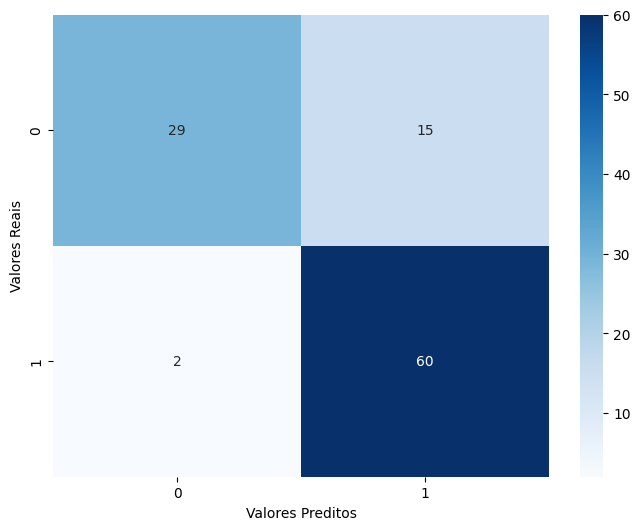

=================================================== Topico 06 ===================================================

Iniciando tópico 03...
Separando os dados em treinamento e teste...

Iniciando tópico 04...
Criando e treinando o modelo k-NN...

Iniciando tópico 05...
Realizando a classificação nos dados de teste...
(A) Acurácia: 0.8584905660377359
(B) Precisão: 0.821917808219178
(C) Recall: 0.967741935483871
(D) F1-Score: 0.8888888888888888
(F) Matriz de confusão:


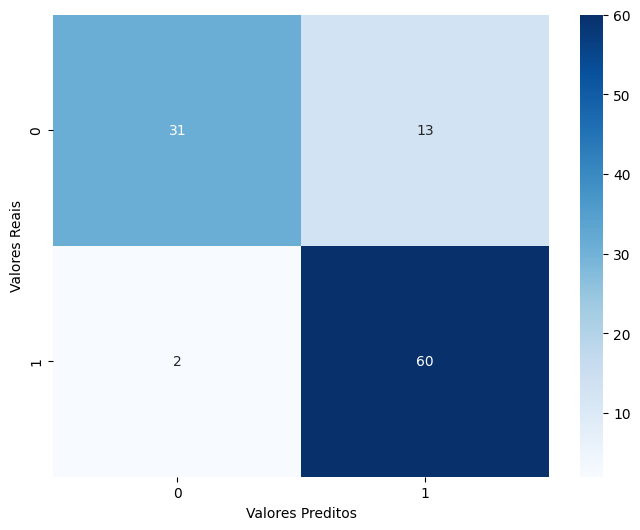

=================================================== Topico 07 ===================================================

Iniciando tópico 03...
Separando os dados em treinamento e teste...

Iniciando tópico 04...
Criando e treinando o modelo k-NN...

Iniciando tópico 05...
Realizando a classificação nos dados de teste...
(A) Acurácia: 0.8679245283018868
(B) Precisão: 0.8333333333333334
(C) Recall: 0.967741935483871
(D) F1-Score: 0.8955223880597015
(F) Matriz de confusão:


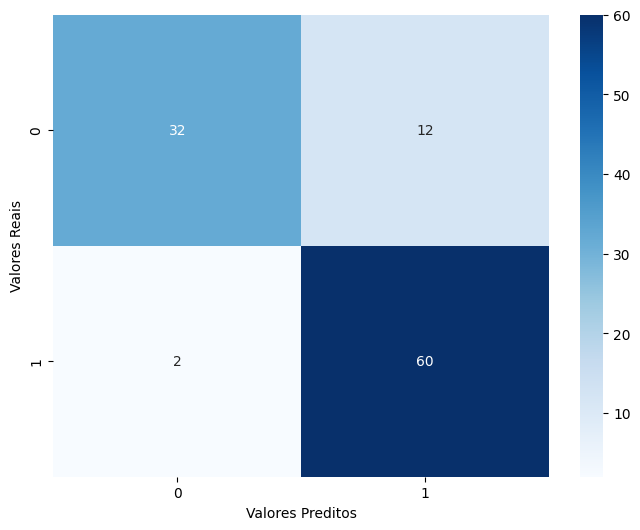

=================================================== Topico 07 ===================================================

Iniciando tópico 03...
Separando os dados em treinamento e teste...

...Iniciando tópico 08...
Melhor valor de k:2

Iniciando tópico 04...
Criando e treinando o modelo k-NN...

Iniciando tópico 05...
Realizando a classificação nos dados de teste...
(A) Acurácia: 0.8490566037735849
(B) Precisão: 0.8108108108108109
(C) Recall: 0.967741935483871
(D) F1-Score: 0.8823529411764706
(F) Matriz de confusão:


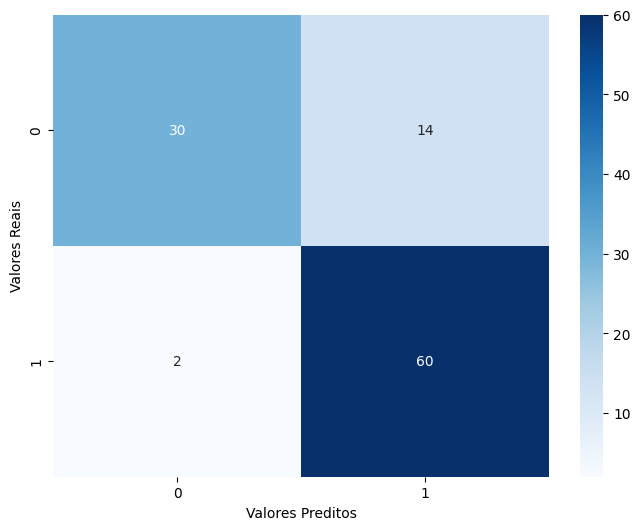

In [13]:
# Separando os dados de entrada(entry) e saída(exit) considerando que 
# a coluna de índice 34 corresponde ao label dos dados de cada linha
print('Iniciando tópico 02...')
entry = dataFrame.iloc[:, :-1]
exit = dataFrame.iloc[:, 34] # Para esse cenário, como a coluna 34 esta na ultima posição, tbm poria ser "iloc[:, -1]"
print('\033[33mDados separados...\n\033[m')

# Mapear os rótulos 'b' e 'g' para 0 e 1, respectivamente
# Essa linha foi necessaria para viabilizar o calculo de precisão
# no tópico 05
exit = exit.map({'b': 0, 'g': 1})

# Definir o número de vizinhos k
k = 5

print('\033[33m=============================================== Topicos iniciais ===============================================\n\033[m')
# Tópicos iniciais:
train_evaluate_knn(entry, exit, k = k)

print('\033[33m=================================================== Topico 06 ===================================================\n\033[m')
# Tópico 06: Método de seleção de features por limiar de variância
var_threshold = VarianceThreshold(threshold = (0.35 * (1 - 0.35)))
train_evaluate_knn(entry, exit, feature_selector = var_threshold, k = k)

print('\033[33m=================================================== Topico 07 ===================================================\n\033[m')
# Tópico 07: Extração de Features por Análise de Componentes Principais (PCA)
train_evaluate_knn(entry, exit, pca_variance=0.85, k=k)

print('\033[33m=================================================== Topico 07 ===================================================\n\033[m')
# Tópico 07: Extração de Features por Análise de Componentes Principais (PCA)
train_evaluate_knn(entry, exit, pca_variance=0.85, k=k, cv=5)

## Qestão 02:  
Compare os resultados obtidos em todos os processos do item anterior e justifique as diferenças obtidas através dos conceitos de engenharia de features estudados durante as aulas síncronas.


Após analise do grupo sobre os resultados obtidos para cada abordagem de engenharia de features, podemos fazer as seguintes conclusões:

### Seleção de Features por limiar de variância:
01. Quando aplicamos essa abordagem, houve um ligeiro aumento na acurácia em relação aos dados originais(prposto do tópico 01 ao 05). Isso indica que a seleção de features foi efetiva em melhorar o desempenho do modelo;<br>
02. Nossa precisão também teve um aumento em relação aos dados originais, o que indica que o modelo está fazendo menos falsos positivos.<br>
03. O recall permaneceu o mesmo, indicando que o modelo está capturando a mesma quantidade de verdadeiros positivos.<br>
04. O F1-Score aumentou, indicando que teve uma melhora geral na medida de desempenho que considera tanto a precisão quanto o recall.<br>

### PCA (Análise de Componentes Principais):
01. Quando aplicamos essa abordagem, assim como quando aplicamos a Seleção de Features por limiar de variância, houve um aumento na acurácia em relação aos dados originais. Indicando tambem que a redução de dimensionalidade do PCA ajudou a melhorar o desempenho do modelo.<br>
02. Novamente obtivemos o amuneto da precisão, indicando tambem uma redução nos falsos positivos.<br>
03. O recall permaneceu novamente permaneceu o mesmo, indicando que o modelo continua capturando a mesma quantidade de verdadeiros positivos.<br>
04. O F1-Score aumentou novamente, indicando uma melhora geral na medida de desempenho.<br>

### Validação Cruzada com K-fold:
01. Obtivemos que o valor ótimo de k encontrado foi 2.<br>
02. Diferente das outras duas abordagens, nesse caso a acurácia permaneceu próxima aos dados originais, indicando que a validação cruzada não teve um impacto significativo no desempenho do modelo.<br>
03. Tivemos uma diminuição pequena da precisão em relação aos dados originais.<br>
04. O recall permaneceu o mesmo novamente.<br>
05. O F1-Score diminuiu ligeiramente.<br>

Analisando um comparativo geral dos dados obtidos, é facil concluir que a seleção de features por limiar de variância e a aplicação do PCA trouxeram melhorias no desempenho do modelo em comparação com os dados originais. No entanto, a validação cruzada com k-fold não apresentou um impacto significativo nos resultados, com desempenho semelhante aos dados originais. 